In [1]:
import pandas as pd 
from matplotlib import *
from plotnine import * 
from scipy import  stats
import datetime


In [2]:
#### params
variable = "Utilidad"


De manera inusual el conjunto de datos presenta las siguientes características positivas:
 - No presenta nulos
 - Sus valores numéricos están dentro de los rangos para no ser considerados inusuales
 - Presentan las ventas de 3 tiendas para 6 productos de manera semanal


In [3]:
data = pd.read_excel("Ejercicio CD.XLSX", sheet_name="VENTAS_PROD")
data.TIENDA = data.TIENDA.astype(str)
data.PRODUCTO = data.PRODUCTO.astype(str)
#data.SEMANA = data.SEMANA.astype(str)
data.AÑO = data.AÑO.astype(str)

data["UtilidadUnitaria"] = data.Utilidad/data["venta unidades"]
data["Fecha"] =  data.apply(lambda x :    str(int(x["AÑO"])) + "-W" + str(int(x["SEMANA"])), axis=1)
data["Fecha"] = data.apply ( lambda x : datetime.datetime.strptime( x["Fecha"] +'-1'  ,  "%Y-W%W-%w" ), axis=1) 
#data =data.drop(columns= [ "SEMANA"])
data = data.sort_values(by= "Fecha") 
data

,PRODUCTO,TIENDA,AÑO,SEMANA,Utilidad,venta neta,venta unidades,UtilidadUnitaria,Fecha
790,5,1,2022,1,97.86,351.38,4,24.465000,2022-01-03
721,1,1,2022,1,32.33,309.69,6,5.388333,2022-01-03
783,2,1,2022,1,26.93,79.25,3,8.976667,2022-01-03
666,6,2,2022,1,70.47,283.04,8,8.808750,2022-01-03
754,1,2,2022,1,84.19,361.56,6,14.031667,2022-01-03
...,...,...,...,...,...,...,...,...,...
781,5,2,2023,30,37.05,192.98,2,18.525000,2023-07-24
566,3,2,2023,30,358.30,1013.24,13,27.561538,2023-07-24
589,2,2,2023,30,38.51,128.90,5,7.702000,2023-07-24
693,1,2,2023,30,3.06,294.12,6,0.510000,2023-07-24


In [4]:
data.describe()

,SEMANA,Utilidad,venta neta,venta unidades,UtilidadUnitaria,Fecha
count,849.000000,849.000000,849.000000,849.000000,848.000000,849
mean,23.737338,877.087456,3039.451131,50.222615,-inf,2022-10-10 01:34:58.939929344
min,1.000000,-356.870000,-3.210000,0.000000,-inf,2022-01-03 00:00:00
25%,11.000000,98.470000,516.890000,8.000000,6.773701,2022-05-30 00:00:00
50%,22.000000,261.320000,1239.950000,29.000000,15.921412,2022-10-17 00:00:00
75%,36.000000,621.070000,2915.740000,62.000000,27.777129,2023-02-13 00:00:00
max,53.000000,12617.990000,35440.130000,531.000000,73.830000,2023-07-24 00:00:00
std,14.915423,1551.541901,4682.538375,65.743363,NaN,NaN


In [5]:
data[["Utilidad", "venta neta", "venta unidades"]].corr()

,Utilidad,venta neta,venta unidades
Utilidad,1.000000,0.964696,0.857215
venta neta,0.964696,1.000000,0.939940
venta unidades,0.857215,0.939940,1.000000


En vista de que la Utilidad, venta neta y el volumen de venta están correlacionados prestaremos atención en el análisis a la utilidad neta ya que es más sencillo de interpretar debido a que se refleja en dinero. 



Podemos notar que la utilidad de los productos no es uniforme a través del tiempo y de los productos en las tiendas por ejemplo el producto con mayor utilidad por unidad de venta es el siguiente: 


In [6]:
print(data[data.UtilidadUnitaria>73])
data.loc[ data.PRODUCTO=='4', ]

    PRODUCTO TIENDA   AÑO  SEMANA  Utilidad  venta neta  venta unidades  \
732        4      2  2022      49    295.32      643.32               4   

     UtilidadUnitaria      Fecha  
732             73.83 2022-12-05  


,PRODUCTO,TIENDA,AÑO,SEMANA,Utilidad,venta neta,venta unidades,UtilidadUnitaria,Fecha
722,4,2,2022,35,68.09,155.09,1,68.09,2022-08-29
501,4,1,2022,35,136.18,310.18,2,68.09,2022-08-29
658,4,2,2022,36,68.09,155.09,1,68.09,2022-09-05
818,4,2,2022,37,92.26,266.26,2,46.13,2022-09-12
801,4,1,2022,37,68.09,155.09,1,68.09,2022-09-12
...,...,...,...,...,...,...,...,...,...
841,4,2,2023,22,21.56,108.56,1,21.56,2023-05-29
827,4,1,2023,24,21.56,108.56,1,21.56,2023-06-12
727,4,2,2023,24,21.56,108.56,1,21.56,2023-06-12
688,4,2,2023,27,21.56,108.56,1,21.56,2023-07-03


In [7]:
data.isna().sum()

PRODUCTO            0
TIENDA              0
AÑO                 0
SEMANA              0
Utilidad            0
venta neta          0
venta unidades      0
UtilidadUnitaria    1
Fecha               0
dtype: int64

In [8]:
data.PRODUCTO.value_counts().sort_values()

PRODUCTO
4     68
6    122
5    157
1    166
3    166
2    170
Name: count, dtype: int64

In [9]:
data.TIENDA.value_counts().sort_values()

TIENDA
9      4
2    418
1    427
Name: count, dtype: int64



De las gráfica siguiente es notorio que la tienda 9 tiene un desempeño de venta inferior respecto a las otras 2 a lo largo del año 2022 y lo que va del 2023 


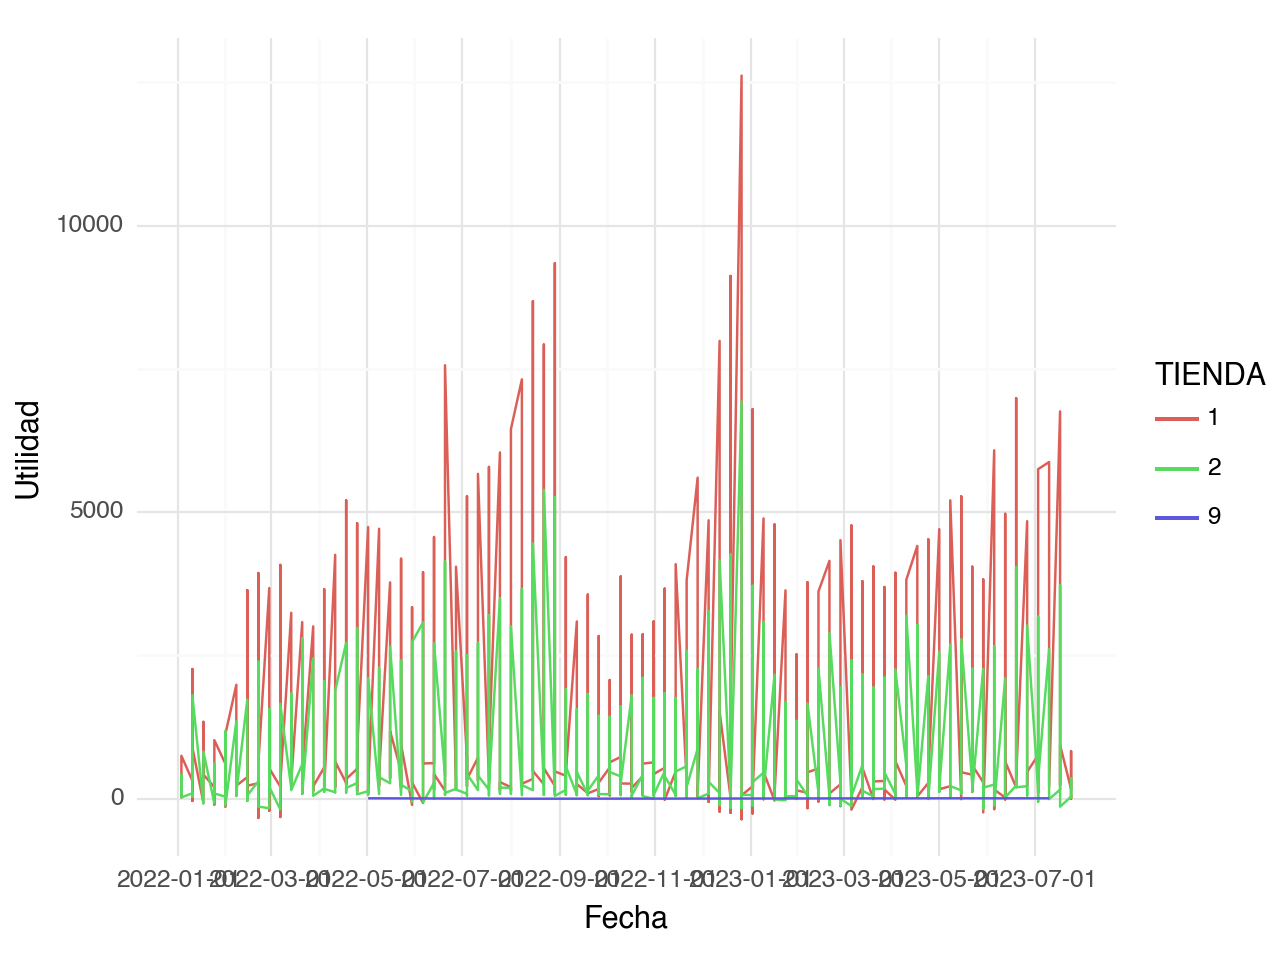

<Figure Size: (640 x 480)>

In [10]:
ggplot(data ) + geom_line(aes(y=variable, x="Fecha", color="TIENDA")) + theme_minimal()


Se realiza una prueba estadística de medias con el fin de medir el desempeño de cada tienda a lo largo del año 2022 y lo que va del 2023, arrojando que el desempeño es el mismo. 

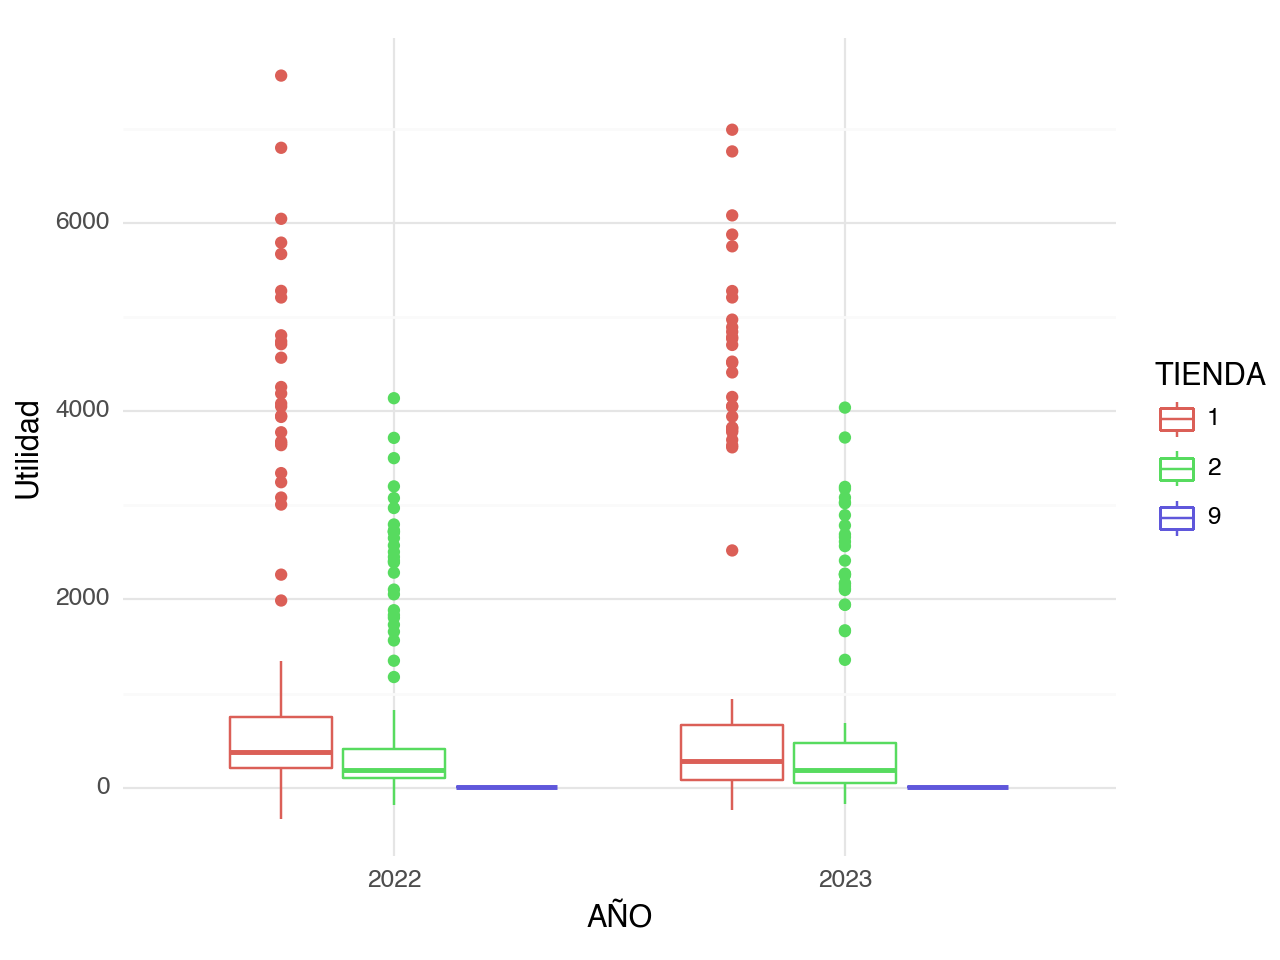

<Figure Size: (640 x 480)>

In [11]:
#data.groupby(["TIENDA", "PRODUCTO"])["Utilidad"].sum()
data_slice = data[ data.Fecha.dt.month <= 7 ].copy()
ggplot(data_slice ) + geom_boxplot(aes(y=variable, x="AÑO", color="TIENDA")) + theme_minimal()


In [12]:
print(data_slice.groupby(["AÑO"])["Utilidad"].mean())
data_slice.groupby(["AÑO", "TIENDA"])["Utilidad"].mean()


AÑO
2022    819.964391
2023    875.497376
Name: Utilidad, dtype: float64


AÑO   TIENDA
2022  1         1048.402244
      2          595.289032
      9            8.340000
2023  1         1108.906389
      2          641.110735
      9            8.340000
Name: Utilidad, dtype: float64

In [13]:
res = stats.ttest_1samp(data_slice.Utilidad[(data_slice.AÑO=='2022')], popmean=819.96439)
print(res.confidence_interval())
res = stats.ttest_1samp(data_slice.Utilidad[(data_slice.TIENDA=='1') & ((data_slice.AÑO=='2022'))], popmean=1048.402244)
print(res.confidence_interval())
res = stats.ttest_1samp(data_slice.Utilidad[(data_slice.TIENDA=='2') & ((data_slice.AÑO=='2022'))], popmean=595.289032)
print(res.confidence_interval())
res = stats.ttest_1samp(data_slice.Utilidad[(data_slice.TIENDA=='9') & ((data_slice.AÑO=='2022'))], popmean=8.34)
print(res.confidence_interval())

ConfidenceInterval(low=670.4082907318297, high=969.5204913194524)
ConfidenceInterval(low=791.5108957443065, high=1305.2935914351808)
ConfidenceInterval(low=446.7090692340937, high=743.8689952820353)
ConfidenceInterval(low=nan, high=nan)


/Users/antonio/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
/Users/antonio/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply


In [14]:
data_slice[["Utilidad",	"venta neta", 	"venta unidades"]].corr()

,Utilidad,venta neta,venta unidades
Utilidad,1.000000,0.958967,0.875212
venta neta,0.958967,1.000000,0.957615
venta unidades,0.875212,0.957615,1.000000


Se realizó un análisis para contrastar la hipótesis de que los productos tenían el mismo desempeño durante los primeros 6 meses de los años 2022 y 2023 del cual se concluye que tienen el mismo desempeño en promedio. 


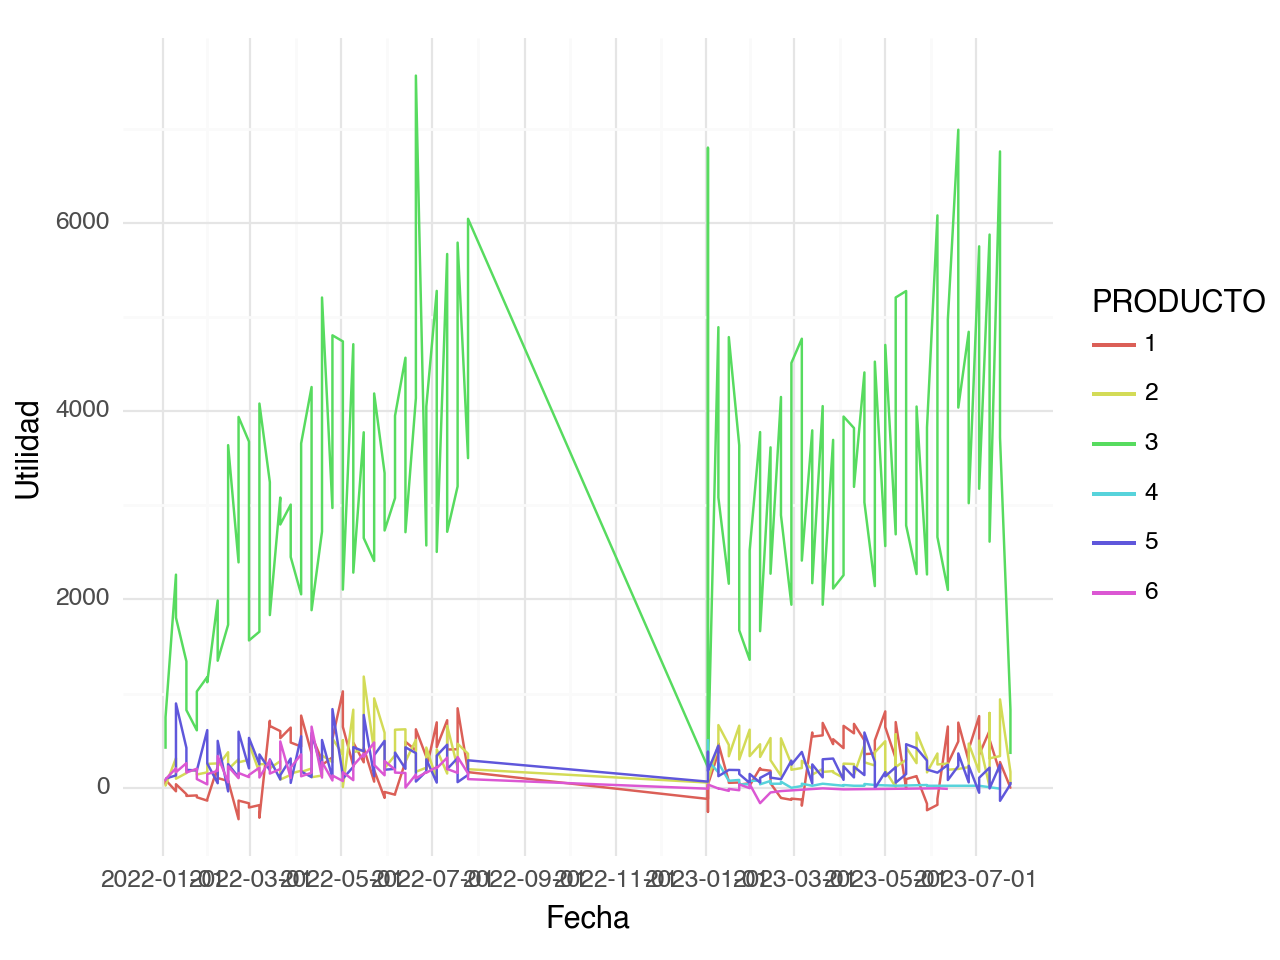

<Figure Size: (640 x 480)>

In [15]:
ggplot(data_slice ) + geom_line(aes(y='Utilidad', x="Fecha", color="PRODUCTO")) + theme_minimal()


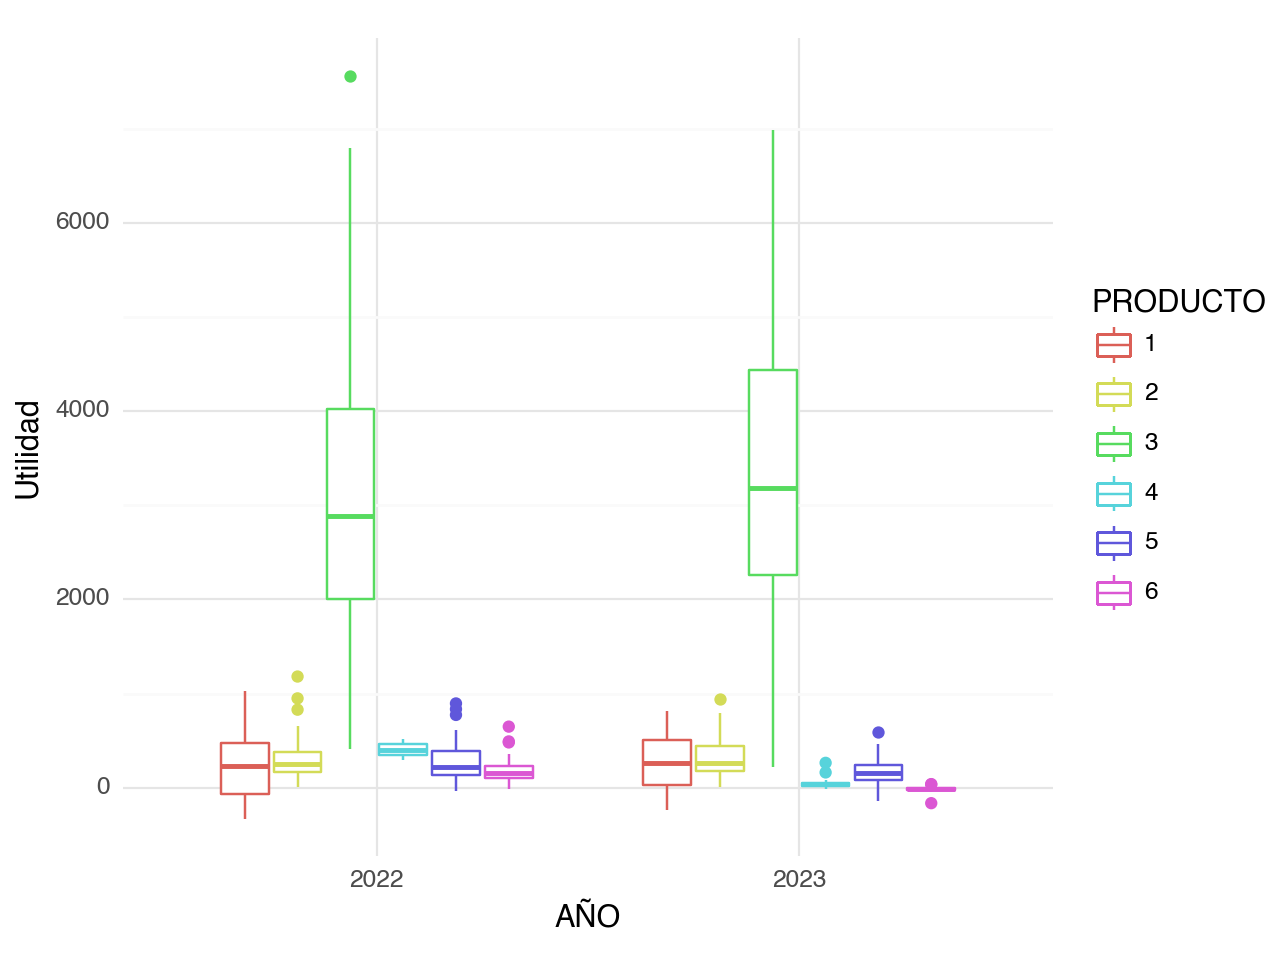

<Figure Size: (640 x 480)>

In [16]:
ggplot(data_slice ) + geom_boxplot(aes(y="Utilidad", x="AÑO", color="PRODUCTO")) + theme_minimal()


In [17]:
data_slice.groupby(["AÑO", "PRODUCTO"])["Utilidad"].mean()


AÑO   PRODUCTO
2022  1            235.349677
      2            302.722222
      3           3098.871452
      4            403.505000
      5            289.420656
      6            186.677581
2023  1            266.801667
      2            309.455323
      3           3352.547667
      4             47.970000
      5            176.793396
      6            -19.628125
Name: Utilidad, dtype: float64

In [18]:
prods= ['1','2','3','4','5','6'] 
prods_vals = [235, 302, 3095, 403, 289, 186]
for _ in range(len(prods)): 
    print(prods[_])
    res = stats.ttest_1samp(data_slice.Utilidad[(data_slice.PRODUCTO==prods[_]) & ((data_slice.AÑO=='2022'))], popmean= prods_vals[_])
    print(res.confidence_interval())

1
ConfidenceInterval(low=152.77212411633323, high=317.9272307223764)
2
ConfidenceInterval(low=247.3375541872737, high=358.10689025717073)
3
ConfidenceInterval(low=2706.7851556253836, high=3490.9577476004215)
4
ConfidenceInterval(low=-1040.1104511297326, high=1847.1204511297328)
5
ConfidenceInterval(low=237.9118734106471, high=340.92943806476285)
6
ConfidenceInterval(low=156.60554564026427, high=216.7496156500584)


In [19]:
data_slice

,PRODUCTO,TIENDA,AÑO,SEMANA,Utilidad,venta neta,venta unidades,UtilidadUnitaria,Fecha
790,5,1,2022,1,97.86,351.38,4,24.465000,2022-01-03
721,1,1,2022,1,32.33,309.69,6,5.388333,2022-01-03
783,2,1,2022,1,26.93,79.25,3,8.976667,2022-01-03
666,6,2,2022,1,70.47,283.04,8,8.808750,2022-01-03
754,1,2,2022,1,84.19,361.56,6,14.031667,2022-01-03
...,...,...,...,...,...,...,...,...,...
781,5,2,2023,30,37.05,192.98,2,18.525000,2023-07-24
566,3,2,2023,30,358.30,1013.24,13,27.561538,2023-07-24
589,2,2,2023,30,38.51,128.90,5,7.702000,2023-07-24
693,1,2,2023,30,3.06,294.12,6,0.510000,2023-07-24


In [20]:
data_train = data[ data.Fecha.dt.year >= 2023 ].copy() 
data_train = data_train[  (data.PRODUCTO=='3') & (data.TIENDA =='1')]

#from statsmodels.tsa.api import VAR
#data_train=data_train.set_index("Fecha")
#VAR(endog=data_train["Utilidad"], dates=["SEMANA"]) 

/var/folders/j2/9bhvdzrs5bzgn96g449k238r0000gn/T/ipykernel_24116/1600871637.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


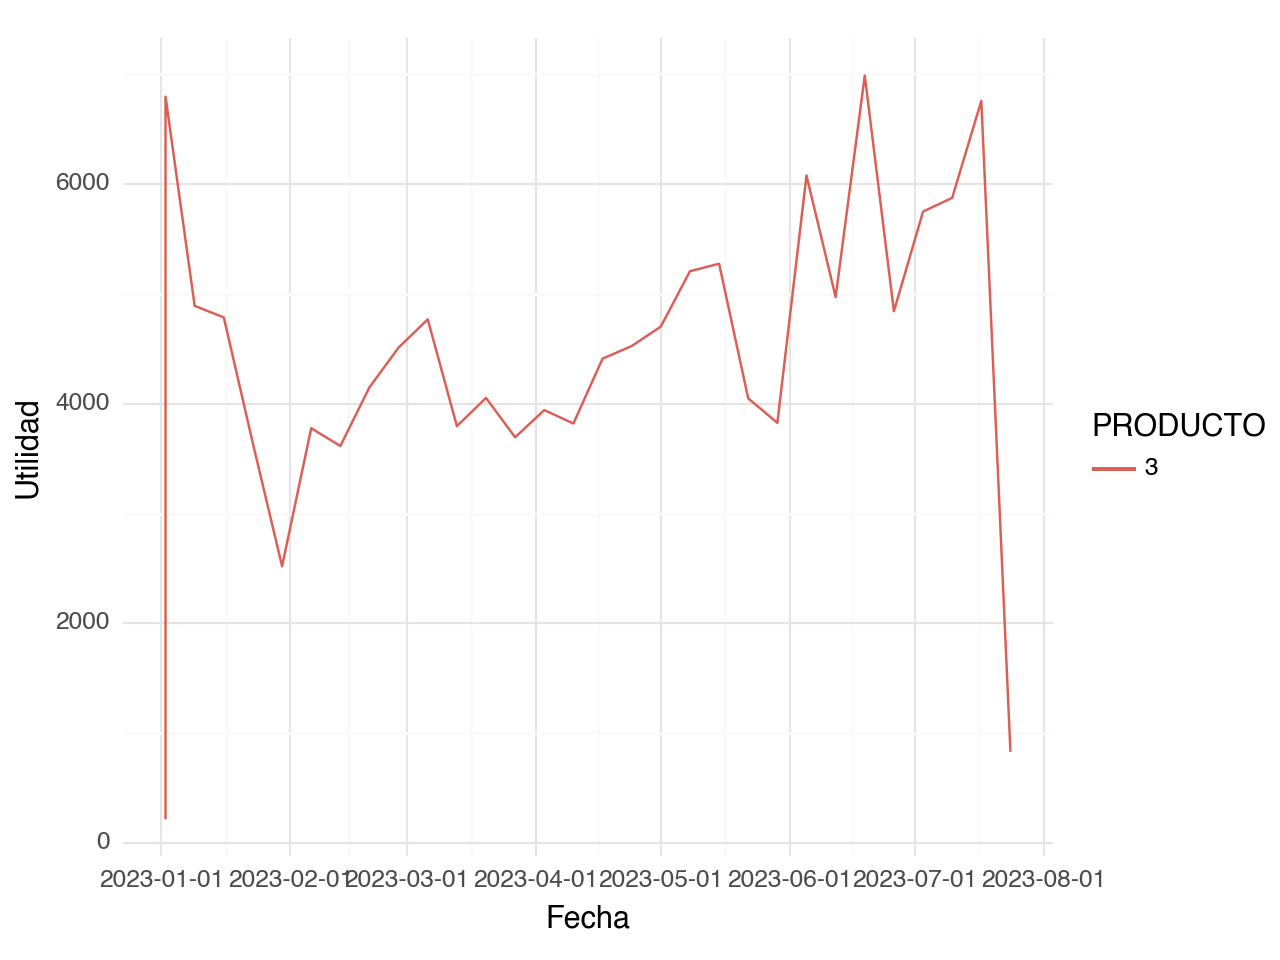

<Figure Size: (640 x 480)>

In [21]:
ggplot(data_train ) + geom_line(aes(y='Utilidad', x="Fecha", color="PRODUCTO")) + theme_minimal()


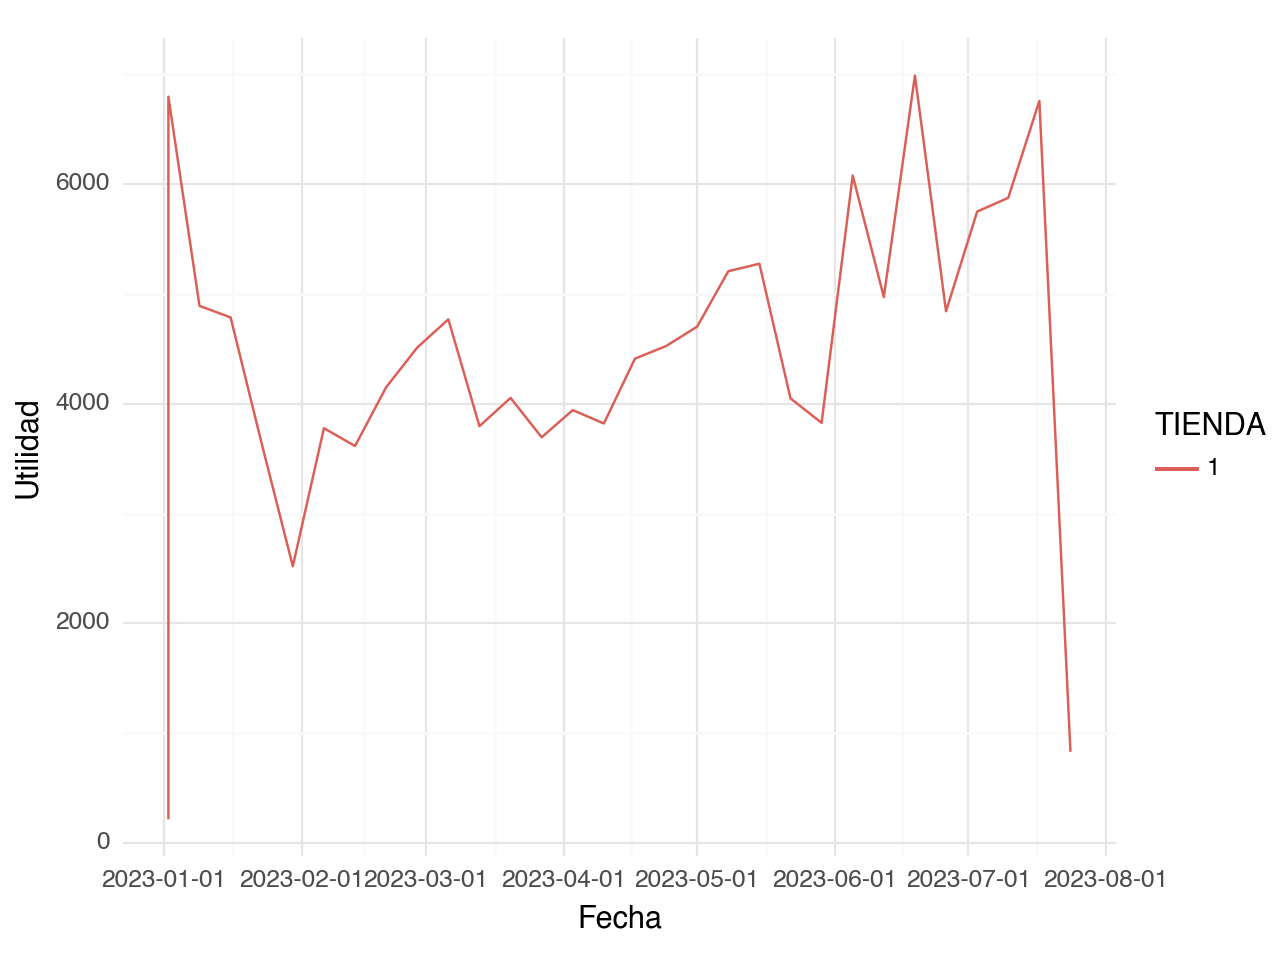

<Figure Size: (640 x 480)>

In [22]:
ggplot(data_train ) + geom_line(aes(y='Utilidad', x="Fecha", color="TIENDA")) + theme_minimal()


In [23]:
data_train.shape

(31, 9)

In [24]:
data_train['VentaAcumulada'] = data["venta neta"].cumsum()

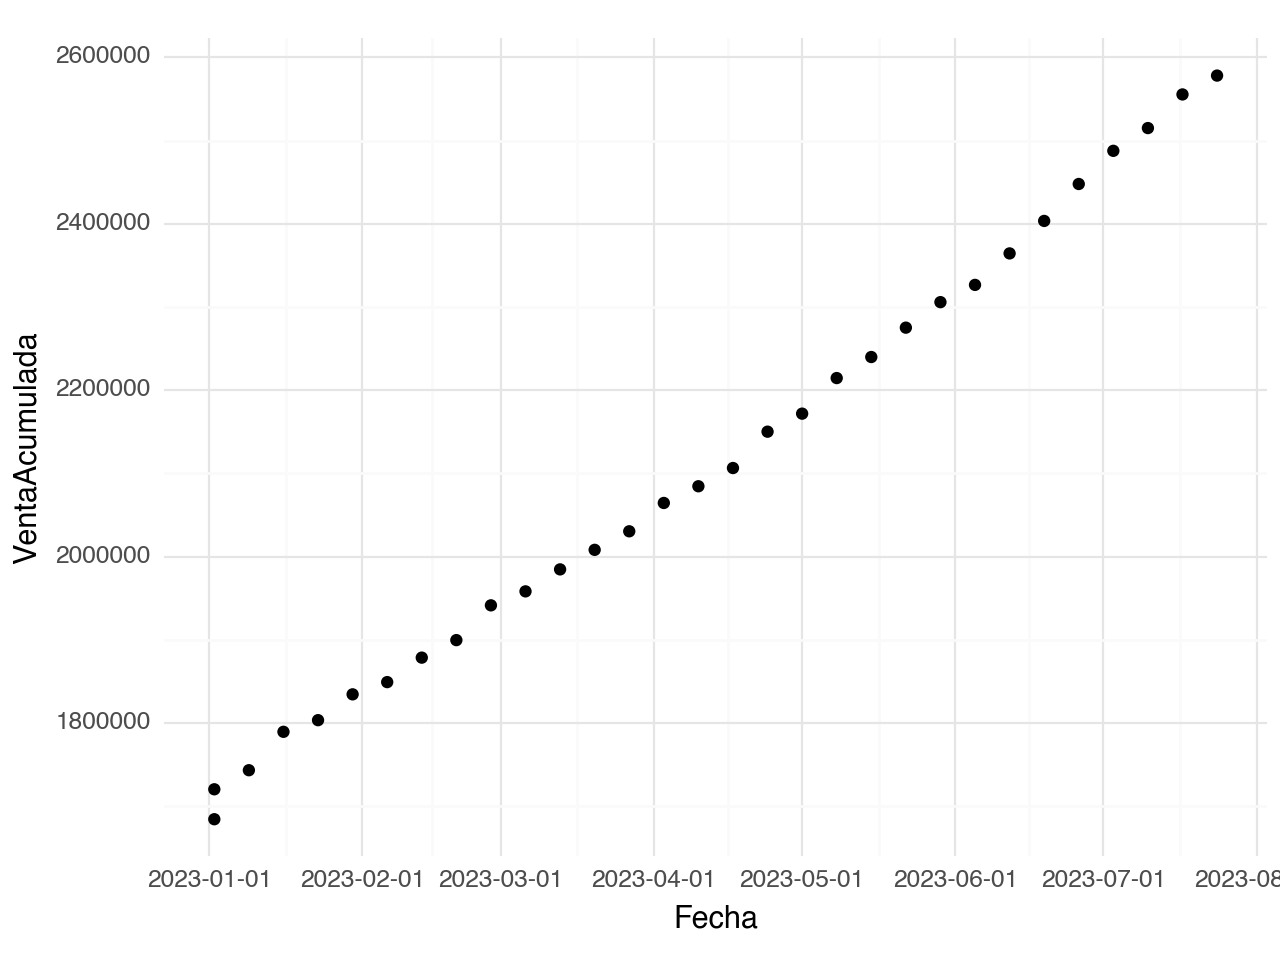

<Figure Size: (640 x 480)>

In [25]:
ggplot(data_train ) + geom_point(aes(y='VentaAcumulada', x="Fecha")) + theme_minimal()


Finalmente se prestó atención al producto y tienda en donde se concentra mayor utilidad y se realizó un pronóstico para la siguiente semana  utilizando la información de los supuestos que ya se tienen. 

Obteniendo un pronóstico de utilidad de $16,805 para la semana 31


In [26]:
from pmdarima.arima import auto_arima
import numpy as np


import matplotlib.pyplot as plt

TEST_SIZE = 2
data_v = data_train[["venta neta"]].copy()

train, test = data_v.iloc[:-TEST_SIZE], data_v.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], data_v.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape


((29, 1), (29,), (2, 1), (2,))

In [27]:
model = auto_arima(train, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=True,   
                      start_P=0, 
                      D=None, 
                      trace=False,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   29
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -281.340
Date:                Thu, 20 Jul 2023   AIC                            566.680
Time:                        11:11:29   BIC                            569.344
Sample:                             0   HQIC                           567.494
                                 - 29                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7865      0.134     -5.861      0.000      -1.050      -0.523
sigma2      2.534e+07   2.77e+06      9.137      0.000    1.99e+07    3.08e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                59.42
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                             2.33
Prob(H) (two-sided):                  0.71   Kurtosis:                         8.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)
prediction

/Users/antonio/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
/Users/antonio/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.


29    16805.562749
30    16805.562749
dtype: float64

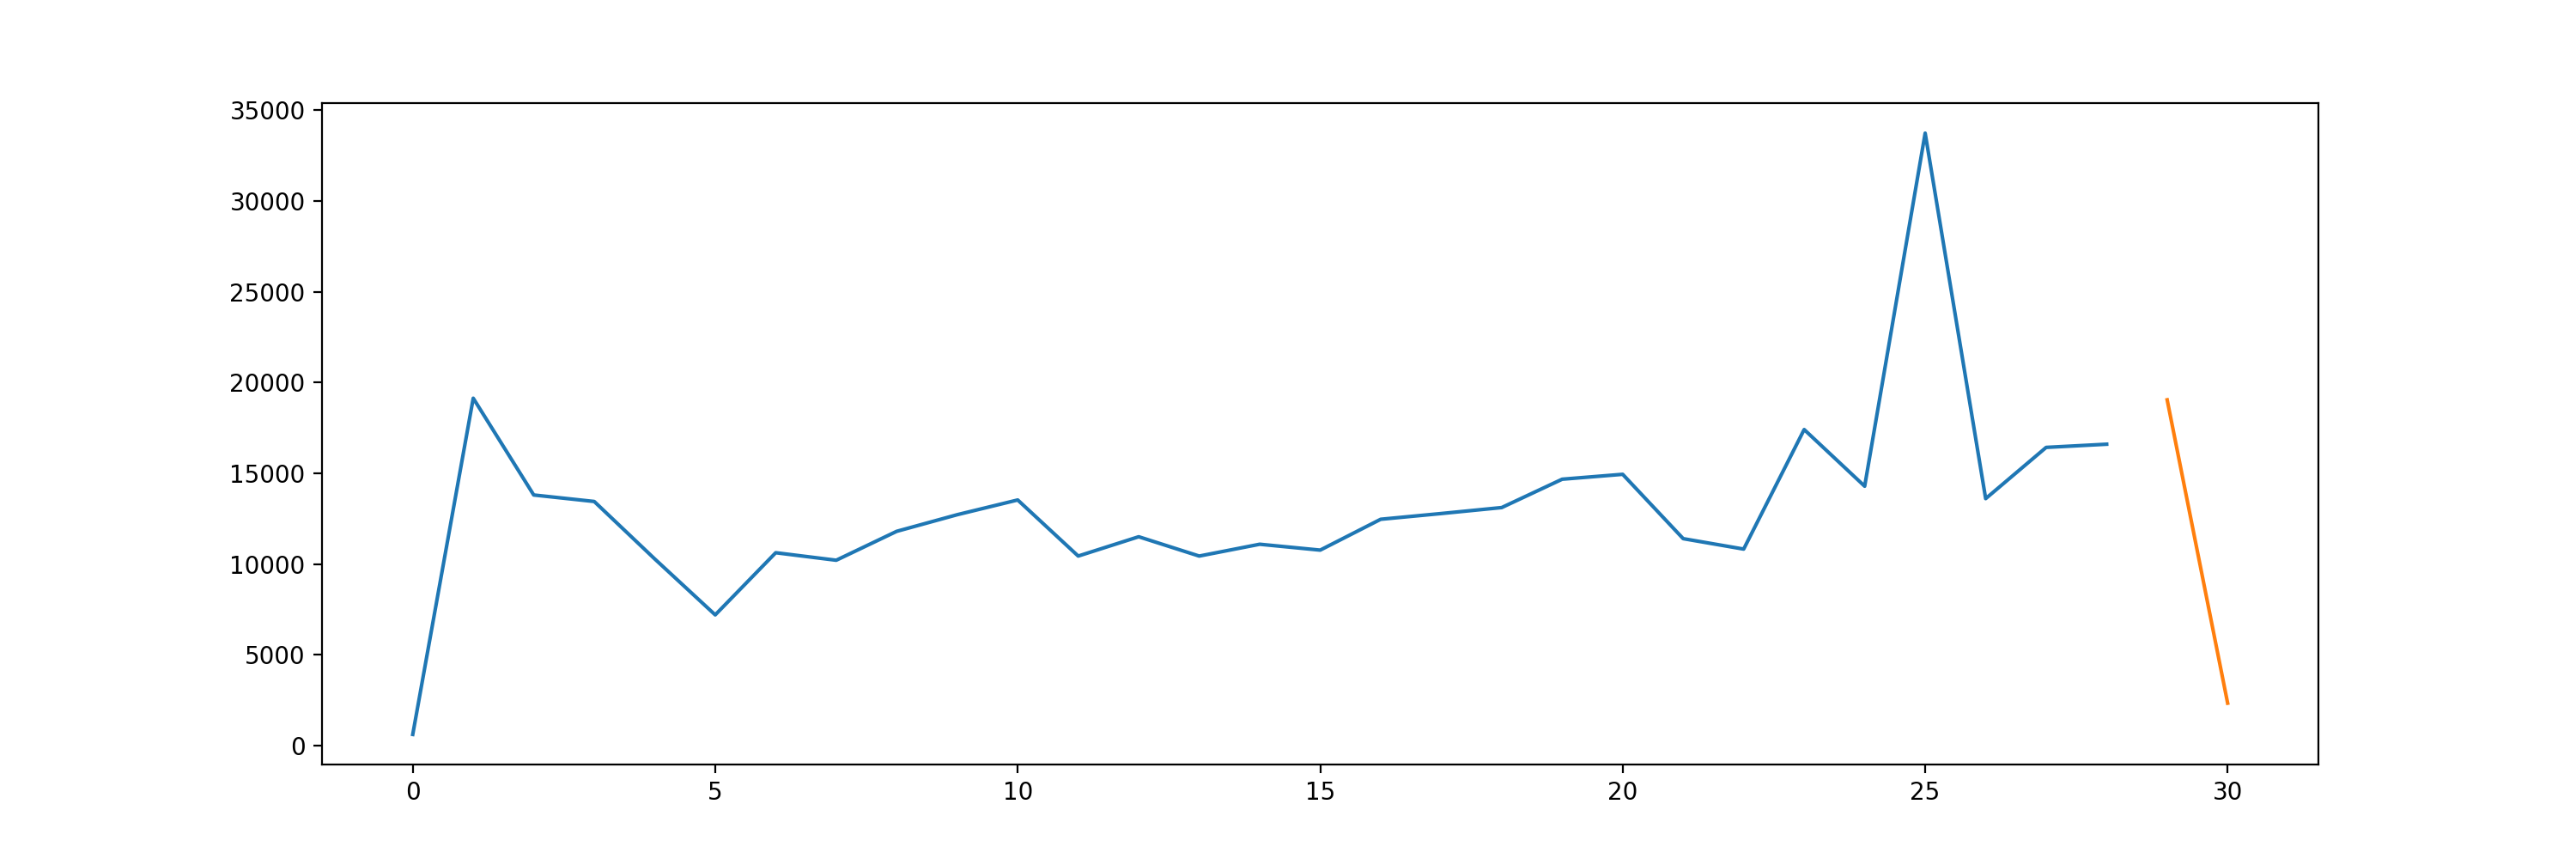

In [30]:

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test)
plt.show()